# Activite/inactive (classification)

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("../src/prot_features_clf.csv")
X = df.iloc[:,1:(len(df.columns)-1)].values
y = pd.get_dummies(df['is_active'])
y = np.array(y['Y'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [2]:
import pickle

with open('../src/clf/X_train.pkl','wb') as f:
    pickle.dump(X_train,f)
    
with open('../src/clf/X_test.pkl','wb') as f:
    pickle.dump(X_test,f)

with open('../src/clf/y_train.pkl','wb') as f:
    pickle.dump(y_train,f)
    
with open('../src/clf/y_test.pkl','wb') as f:
    pickle.dump(y_test,f)

## 1. Random Forest

In [3]:
# best params {'bootstrap': True, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

model = []
cv_accuracy = []
test_accuracy = []

clf = RandomForestClassifier(bootstrap=True, min_samples_leaf=5, min_samples_split=2,n_estimators=200)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.7892300910960918


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       138
           1       0.84      0.78      0.81       136

    accuracy                           0.82       274
   macro avg       0.82      0.82      0.82       274
weighted avg       0.82      0.82      0.82       274

0.8175182481751825


<AxesSubplot:>

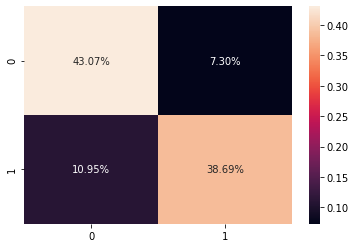

In [4]:
from sklearn.metrics import classification_report, accuracy_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("RF")
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf/np.sum(cf), annot=True,fmt='.2%')

## 2. Feedforward Neural Network

In [5]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=3,max_iter=2000) # max_iter adjusted to reach convergence

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.746650014692918


              precision    recall  f1-score   support

           0       0.72      0.77      0.74       138
           1       0.75      0.69      0.72       136

    accuracy                           0.73       274
   macro avg       0.73      0.73      0.73       274
weighted avg       0.73      0.73      0.73       274

0.7299270072992701


<AxesSubplot:>

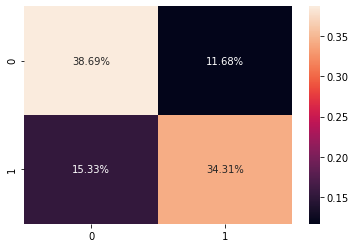

In [6]:
from sklearn.metrics import classification_report, accuracy_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("FNN")
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf/np.sum(cf), annot=True,fmt='.2%')

## 3. Naive-Bayes Classifier

In [7]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() # useKernel=F for R package

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.5785483397002645


              precision    recall  f1-score   support

           0       0.70      0.41      0.52       138
           1       0.58      0.82      0.68       136

    accuracy                           0.61       274
   macro avg       0.64      0.61      0.60       274
weighted avg       0.64      0.61      0.60       274

0.6131386861313869


<AxesSubplot:>

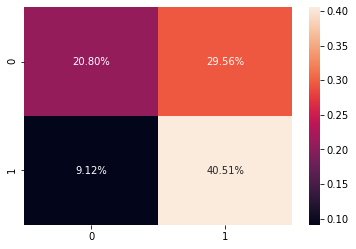

In [8]:
from sklearn.metrics import classification_report, accuracy_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("NB")
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf/np.sum(cf), annot=True,fmt='.2%')

## 4. Summary

<img src="../png/clf.png" style="height: 250px; width:800px"/>

Text(0, 0.5, 'Accuracy')

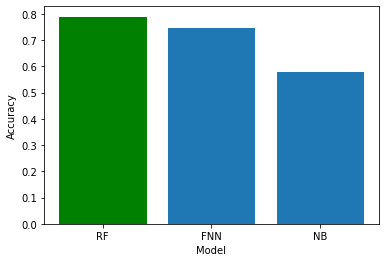

In [9]:
import matplotlib.pyplot as plt
bar_list = plt.bar(model,cv_accuracy)
bar_list[0].set_color('green')
plt.xlabel("Model")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

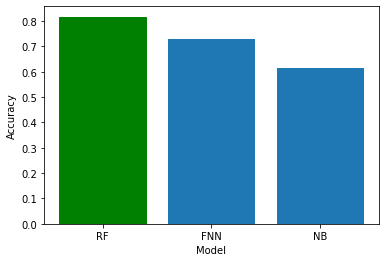

In [10]:
bar_list = plt.bar(model,test_accuracy)
bar_list[0].set_color('green')
plt.xlabel("Model")
plt.ylabel("Accuracy")